## Streudiagramme (Scatter plots)

* Autorin: Anna (i3-Versicherung)
* Webseite: [Data Science Training - Kapitel 2](https://data-science.training/kapitel-2/)
* Datum: 23.03.2023

Wir erstellen Streudiagramme zu ausgewählten Attribut-Kombinationen --
mit Hilfe der Seaborn-Bibliothek.

In [4]:
# Pandas Paket (Package) importieren
#  Datenstrukturen und Datenanalyse, I/O
#  https://pandas.pydata.org/pandas-docs/stable/
import pandas as pd
# Pyplot Modul der Matplot Bibliothek (Library) importieren
#  Mathematische grafische Daten-Visualisierungen
#  https://matplotlib.org/contents.html
import matplotlib.pyplot as plt
# Seaborn importieren [sns = seaborn name space, Samuel Norman Seaborn]
#  High-end Daten-Visualisierungen auf Basis von Matplot
#  https://seaborn.pydata.org/
import seaborn as sns
# Deutsches Zahlenformat
import locale
locale.setlocale(locale.LC_ALL, 'de')
# Warnungen unterdrücken
#import warnings
#warnings.filterwarnings('ignore')

'de'

In [5]:
# Trainingsdaten als Pandas Data Frame (df) aus CSV-Dateien laden
#  (KNIME: "CSV Reader")
df_train = pd.read_csv('../../data/titanic/original/train.csv')

In [6]:
# Datentypen automatisch konvertieren
df_train = df_train.convert_dtypes()

In [7]:
# Informationen anzeigen lassen (insbesondere die Indizes der Attribute)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    Int64  
 1   Survived     891 non-null    Int64  
 2   Pclass       891 non-null    Int64  
 3   Name         891 non-null    string 
 4   Sex          891 non-null    string 
 5   Age          714 non-null    Float64
 6   SibSp        891 non-null    Int64  
 7   Parch        891 non-null    Int64  
 8   Ticket       891 non-null    string 
 9   Fare         891 non-null    Float64
 10  Cabin        204 non-null    string 
 11  Embarked     889 non-null    string 
dtypes: Float64(2), Int64(5), string(5)
memory usage: 89.8 KB


In [8]:
# Seaborn: Allgemeine Einstellungen

# Schriftart setzen
sns.set(font = 'Arial')
# Schriftgröße setzen
sns.set(font_scale = 2.5)
# Achsen im deutschen Zahlenformat
plt.rcParams['axes.formatter.use_locale'] = True
# Bildgröße setzen (16 x 9)
sns.set(rc={'figure.figsize':(8, 4.5)})
# Weißes Gitter setzen
sns.set_style('whitegrid')

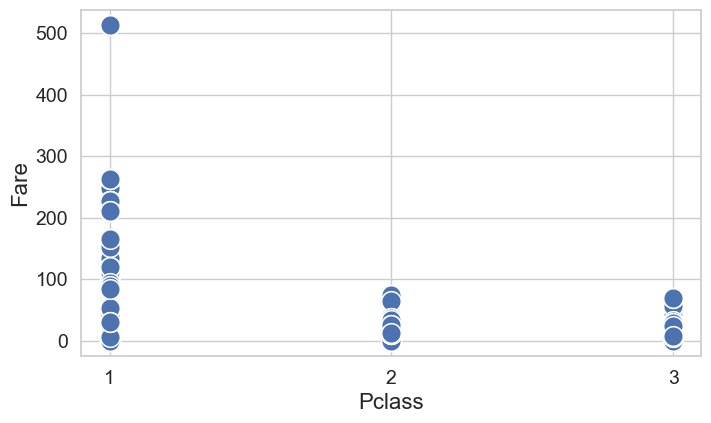

In [9]:
# Streudiagramm: Fare (Plass)
sns.scatterplot(data=df_train, x='Pclass', y='Fare', s=200)
plt.xticks([1, 2, 3])
plt.xlabel('Pclass', fontsize=16)
plt.ylabel('Fare', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
# Grafik speichern
plt.savefig('../../figures/svg/Scatter_Pclass_Fare.svg', format='svg', dpi=1200, transparent=True)

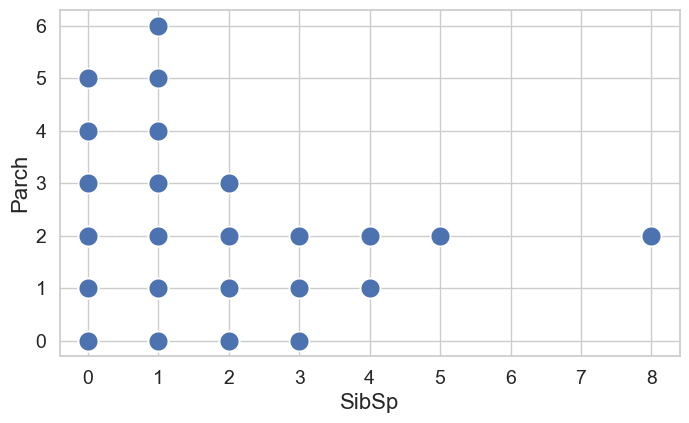

In [10]:
# Streudiagramm: Parch (SibSp)
sns.scatterplot(data=df_train, x='SibSp', y='Parch', s=200)
plt.xlabel('SibSp', fontsize=16)
plt.ylabel('Parch', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
# Grafik speichern
plt.savefig('../../figures/svg/Scatter_SibSp_Parch.svg', format='svg', dpi=1200, transparent=True)

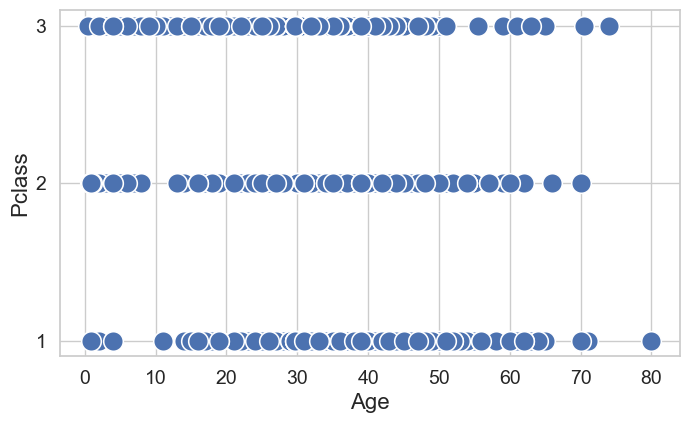

In [11]:
# Streudiagramm: Pclass (Age)
#  zunächst fehlende Werte "behandeln"
mean = df_train['Age'].mean()
#df_train['Age'].fillna(mean, inplace=True)
df_train['Age'] = df_train['Age'].fillna(mean)
#
sns.scatterplot(data=df_train, x='Age', y='Pclass', s=200)
plt.yticks([1, 2, 3])
plt.xlabel('Age', fontsize=16)
plt.ylabel('Pclass', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
# Grafik speichern
plt.savefig('../../figures/svg/Scatter_Age_Pclass.svg', format='svg', dpi=1200, transparent=True)

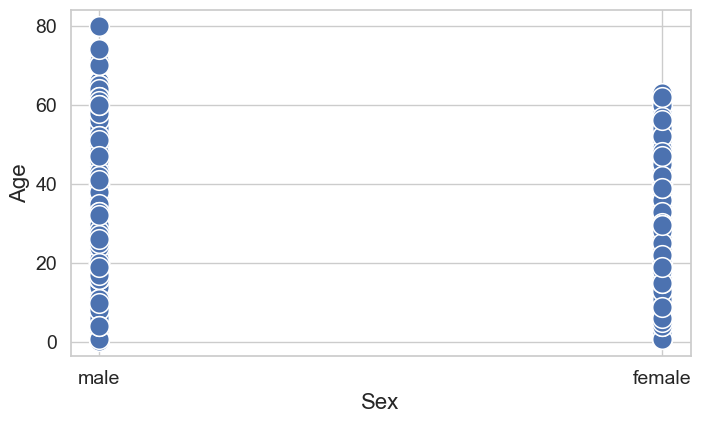

In [12]:
# Streudiagramm: Age (Sex)
sns.scatterplot(data=df_train, x='Sex', y='Age', s=200)
plt.xlabel('Sex', fontsize=16)
plt.ylabel('Age', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
# Grafik speichern
plt.savefig('../../figures/svg/Scatter_Sex_Age.svg', format='svg', dpi=1200, transparent=True)

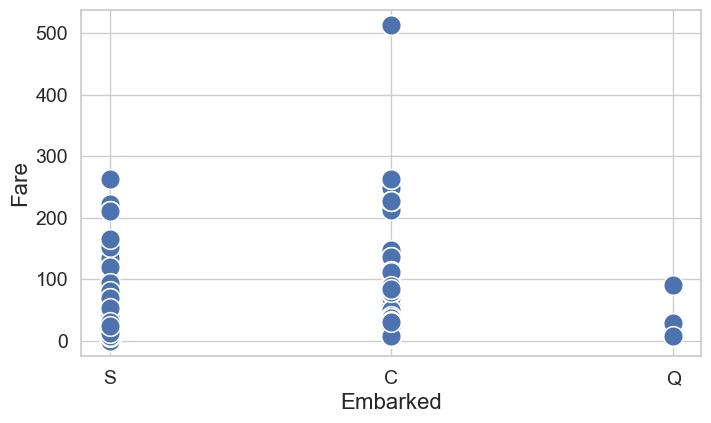

In [13]:
# Streudiagramm: Fare (Embarked)
#  zunächst fehlende Werte "behandeln"
mode = df_train['Embarked'].mode()[0]
#df_train['Embarked'].fillna(mode, inplace=True)
df_train['Embarked'] = df_train['Embarked'].fillna(mode)
#
sns.scatterplot(data=df_train, x='Embarked', y='Fare', s=200)
plt.xlabel('Embarked', fontsize=16)
plt.ylabel('Fare', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
# Grafik speichern
plt.savefig('../../figures/svg/Scatter_Embarked_Fare.svg', format='svg', dpi=1200, transparent=True)

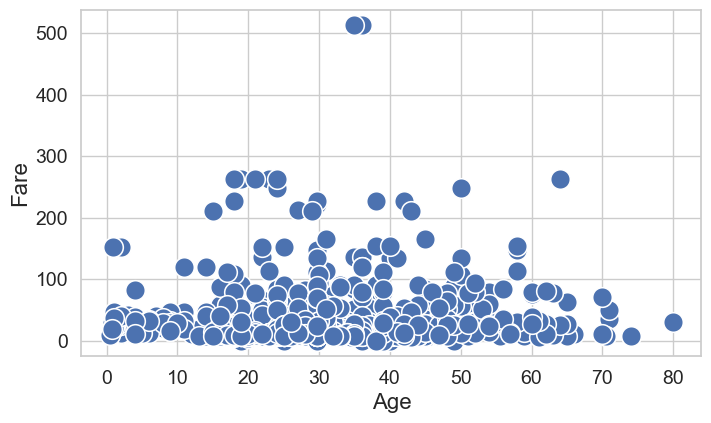

In [14]:
# Streudiagramm: Fare (Age)
sns.scatterplot(data=df_train, x='Age', y='Fare', s=200)
plt.xlabel('Age', fontsize=16)
plt.ylabel('Fare', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
# Grafik speichern
plt.savefig('../../figures/svg/Scatter_Age_Fare.svg', format='svg', dpi=1200, transparent=True)

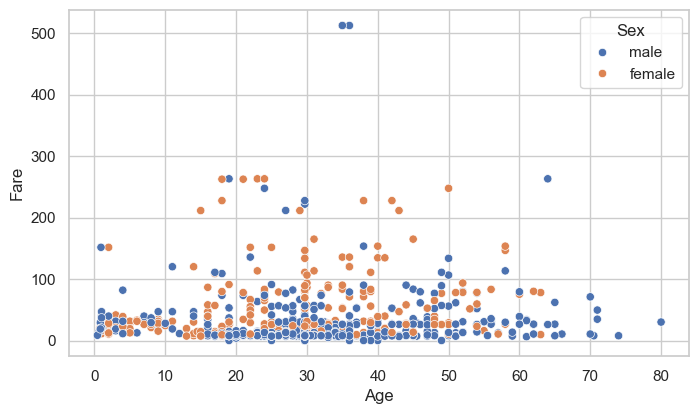

In [15]:
# Streudiagramm: Fare (Age)
sns.scatterplot(data=df_train, x='Age', y='Fare', hue='Sex')
# Grafik speichern
plt.savefig('../../figures/svg/Scatter_Age_Fare_Sex.svg', format='svg', dpi=1200, transparent=True)

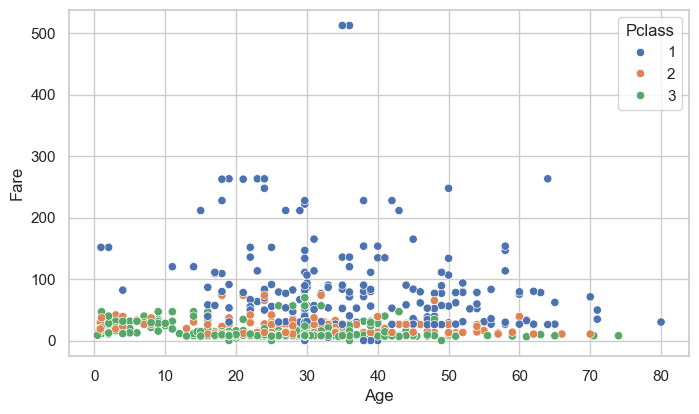

In [16]:
df_train['Pclass'] = pd.Categorical(df_train['Pclass'], [1, 2, 3])
# Streudiagramm: Fare (Age)
sns.scatterplot(data=df_train, x='Age', y='Fare', hue='Pclass')
# Grafik speichern
plt.savefig('../../figures/svg/Scatter_Age_Fare_Pclass.svg', format='svg', dpi=1200, transparent=True)